In [90]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [91]:
def drawGeo(Z,r, ax):
    circle = plt.Circle((0,-Z),r,color = 'orange')
    #fig, ax = plt.subplots(figsize = (10,5))
    ax.set_xlim((-10,10)) 
    ax.set_ylim((-10,0))
    ax.add_artist(circle)
    return;

In [92]:
def Gravitydraw(Z,r,roh_1,roh_2, ax):
    x = np.arange(-10.0, 10.0, 0.01)
    G = 6.67384**-11
    m = (roh_1 - roh_2)*2*math.pi*r**2
    g = 2*Z*G*m/(x**2+Z**2)
    #fig, ax = plt.subplots(figsize = (10,5))
    ax.plot(x,g)
    return g;

In [93]:
class ugobject: #under ground round object
    def __init__(self,Z,r,roh_1,roh_2):
        self.Z = Z  #depth
        self.r = r  #radius
        self.roh1 = roh_1
        self.roh2 = roh_2
        self.gravity = []
        
    def calculate(self):
        f , axs = plt.subplots(2 , sharex = True, figsize = (10,10))
        f.subplots_adjust(hspace=0)
        #axs[0] = drawGeo(self.Z, self.r)
        #axs[1] = Gravitydraw(self.Z, self.r, self.roh1, self.roh2)
        drawGeo(self.Z, self.r, axs[0])
        self.gravity = Gravitydraw(self.Z, self.r, self.roh1, self.roh2, axs[1])
        plt.show()

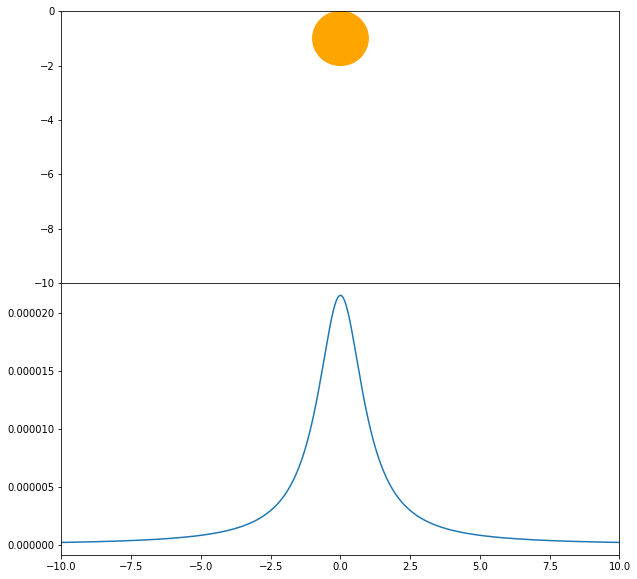

In [94]:
obj1 = ugobject(1,1,4000,2000)
obj1.calculate()

#### Jacobian

In [95]:
%%time
import tensorflow as tf

with tf.Session() as sess:
    
    G = tf.constant(6.67384**-11)
    r = tf.Variable(1.)
    roh_1 = tf.Variable(3000.)
    roh_2 = tf.Variable(1000.)
    Z = tf.Variable(1.)
    tfpi = tf.constant(math.pi)
    m = (roh_1 - roh_2)*2*tfpi*r**2
    X = np.arange(-10.0, 10.0, 0.1, dtype = np.float32)
    

    init_op = tf.global_variables_initializer()# VERY IMPORTANT: Initialize the variables

    sess.run(init_op)

    print(sess.run(g))

# calculate jacobian matrix for all x at (z = 1, r = 1, p1 = 3000, p2 = 1000)

    for x in X:
        g = 2*Z*G*m/(x**2+Z**2)
        grad = sess.run(tf.gradients(g, [Z, r, roh_1, roh_2])) # calculate first order partial derivative wrt to every variable for all x
        print(grad)
      

2.1483556e-05
[2.0849642e-07, 4.2541694e-07, 1.0635424e-10, -1.0635424e-10]
[2.1260064e-07, 4.3396741e-07, 1.08491854e-10, -1.08491854e-10]
[2.1682587e-07, 4.4277738e-07, 1.1069434e-10, -1.1069434e-10]
[2.211768e-07, 4.518574e-07, 1.12964346e-10, -1.12964346e-10]
[2.2565848e-07, 4.612186e-07, 1.15304655e-10, -1.15304655e-10]
[2.302761e-07, 4.708727e-07, 1.1771817e-10, -1.1771817e-10]
[2.3503507e-07, 4.808319e-07, 1.2020797e-10, -1.2020797e-10]
[2.3994124e-07, 4.9110906e-07, 1.2277727e-10, -1.2277727e-10]
[2.4500062e-07, 5.0171815e-07, 1.2542953e-10, -1.2542953e-10]
[2.5021953e-07, 5.1267324e-07, 1.2816831e-10, -1.2816831e-10]
[2.556047e-07, 5.239896e-07, 1.3099741e-10, -1.3099741e-10]
[2.6116314e-07, 5.356833e-07, 1.3392082e-10, -1.3392082e-10]
[2.669022e-07, 5.47771e-07, 1.3694275e-10, -1.3694275e-10]
[2.728297e-07, 5.6027073e-07, 1.4006768e-10, -1.4006768e-10]
[2.7895385e-07, 5.7320125e-07, 1.4330032e-10, -1.4330032e-10]
[2.852833e-07, 5.8658253e-07, 1.4664563e-10, -1.4664563e-10]
[2

[1.3766299e-06, 3.2427126e-06, 8.1067814e-10, -8.1067814e-10]
[1.3184292e-06, 3.0777908e-06, 7.694477e-10, -7.694477e-10]
[1.2633235e-06, 2.9248456e-06, 7.312114e-10, -7.312114e-10]
[1.2111593e-06, 2.782772e-06, 6.95693e-10, -6.95693e-10]
[1.161782e-06, 2.650587e-06, 6.626467e-10, -6.626467e-10]
[1.1150391e-06, 2.5274137e-06, 6.318534e-10, -6.318534e-10]
[1.0707813e-06, 2.4124674e-06, 6.031169e-10, -6.031169e-10]
[1.0288649e-06, 2.3050463e-06, 5.7626154e-10, -5.7626154e-10]
[9.89152e-07, 2.204519e-06, 5.5112975e-10, -5.5112975e-10]
[9.515117e-07, 2.110319e-06, 5.275797e-10, -5.275797e-10]
[9.158196e-07, 2.0219343e-06, 5.054836e-10, -5.054836e-10]
[8.8195844e-07, 1.9389042e-06, 4.8472604e-10, -4.8472604e-10]
[8.49818e-07, 1.8608113e-06, 4.652028e-10, -4.652028e-10]
[8.1929426e-07, 1.787277e-06, 4.4681925e-10, -4.4681925e-10]
[7.902902e-07, 1.7179591e-06, 4.2948978e-10, -4.2948978e-10]
[7.627144e-07, 1.6525448e-06, 4.131362e-10, -4.131362e-10]
[7.364818e-07, 1.5907508e-06, 3.976877e-10, 

## Hessian

#### Hessian simple test 


Because tf.hessian only gives the diagnal elements of the Hessian matrix, here is a simple sulotion to calculate the full Hessian. However, only works for vars are single floats.
https://stackoverflow.com/questions/35266370/tensorflow-compute-hessian-matrix-and-higher-order-derivatives

In [96]:
def cons(x):
    return tf.constant(x, dtype=tf.float32)

x = tf.Variable(np.random.random_sample(), dtype=tf.float32)
y = tf.Variable(np.random.random_sample(), dtype=tf.float32)

f = tf.pow(x, cons(2)) + cons(2) * x * y + cons(3) * tf.pow(y, cons(2)) + cons(4) * x + cons(5) * y + cons(6)

def compute_hessian(fn, vars):
    mat = []
    for v1 in vars:
        temp = []
        for v2 in vars:
            # computing derivative twice, first w.r.t v2 and then w.r.t v1
            temp.append(tf.gradients(tf.gradients(fn, v2)[0], v1)[0])
        temp = [cons(0) if t == None else t for t in temp] # tensorflow returns None when there is no gradient, so we replace None with 0
        temp = tf.stack(temp)
        mat.append(temp)
    mat = tf.stack(mat)
    return mat

hessian = compute_hessian(f, [x, y])

sess = tf.Session()
sess.run(tf.initialize_all_variables())
print (sess.run(hessian))

[[2. 2.]
 [2. 6.]]


In [97]:
import numpy as np
import tensorflow as tf

def HessianGrav(r, roh1, roh2, z, x):
    def cons(x):
        return tf.constant(x, dtype=tf.float32)

    G = tf.constant(6.67384**-11)
    r = tf.Variable(np.float32(r))
    roh_1 = tf.Variable(np.float32(roh1))
    roh_2 = tf.Variable(np.float32(roh2))
    Z = tf.Variable(np.float32(z))
    tfpi = tf.constant(math.pi)
    m = (roh_1 - roh_2)*2*tfpi*r**2
    X = tf.constant(np.float32(x))

    g = 2*Z*G*m/(X**2+Z**2)


    def compute_hessian(fn, vars):
        mat = []
        for v1 in vars:
            temp = []
            for v2 in vars:
                # computing derivative twice, first w.r.t v2 and then w.r.t v1
                temp.append(tf.gradients(tf.gradients(fn, v2)[0], v1)[0])
            temp = [cons(0) if t == None else t for t in temp] # tensorflow returns None when there is no gradient, so we replace None with 0
            temp = tf.stack(temp)
            mat.append(temp)
        mat = tf.stack(mat)
        return mat


    sess = tf.Session()
    sess.run(tf.initialize_all_variables())


    x_list =[Z, r, roh_1, roh_2]

    hessian = compute_hessian(g, x_list)

    print(sess.run(hessian))
    return(hessian)

In [98]:
HessianGrav(1, 3000, 1000, 1, 0) # Hessian matrix of gravity at r = 1, p1= 3000, p2 = 1000, Z = 1, x = 0

[[ 4.2967105e-05 -4.2967113e-05 -1.0741778e-08  1.0741778e-08]
 [-4.2967113e-05  4.2967113e-05  2.1483556e-08 -2.1483556e-08]
 [-1.0741778e-08  2.1483556e-08  0.0000000e+00  0.0000000e+00]
 [ 1.0741778e-08 -2.1483556e-08  0.0000000e+00  0.0000000e+00]]


<tf.Tensor 'stack_55:0' shape=(4, 4) dtype=float32>

### Hessian optimization - Simple gravity


Stuck here, to be continue....

In [1]:
import hipplylib


ModuleNotFoundError: No module named 'hipplylib'